# King County House Sales Analysis
This Exploratory Data Analysis (EDA) project shows step-by-step analyzing housing dataset from King county (USA) that fulfill the requirements of our client.

## Step 1: Client Requirements/Business Idea

* Client name: Larry Sanders
* Type of client: King County's house buyer
* Mr. Sanders' requirements:
    1. Has a view of waterfront 
    2. Enough space for a family
    3. Nice and isolated
    4. Central neighborhood
    5. Limited budget




## Step 2: Acquire Data & Check Correlation

- The datasets from King county housing sales which is stored in SQL database
- Get the data from SQL database using Python
- Connect via SQLAlchemy

In [139]:
# use sqlalchemy to connect to SQL database
from sqlalchemy import create_engine

# use dotenv to read .env file contains the credential
import os
from dotenv import load_dotenv

# read the database string from the .env
load_dotenv()
DB_STRING = os.getenv('DB_STRING')
db = create_engine(DB_STRING)

In [140]:
# import the data to a pandas dataframe
import pandas as pd

# select everything from each tables in the database
qstr1 = "SELECT * FROM eda.king_county_house_sales"
qstr2 = "SELECT * FROM eda.king_county_house_details"

# read SQL query into a DataFrame
df_sales = pd.read_sql(qstr1, db)
df_details = pd.read_sql(qstr2, db)

# check the first 5 rows of the DataFrame sales
df_sales.head()


,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [141]:
# check the first 5 rows of the DataFrame details
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

Done. Now, let's check the correlation. In SQL database, there are always a primary key and a foreign key that connect the tables.   
~~If you look at the SQL database~~   
As you can see, the relationship between two tables are the <r>**house_id**</r> (foreign key from table: house_sales) and <r>**id**</r> (primary key from table: house_details).   

Sort their values in ascending order to confirm the entity-relationship between these two tables.

In [142]:
# sort the values of column house_id in table house_sales
df_sales['house_id'].sort_values().head(3)

2495    1000102
2494    1000102
6729    1200019
Name: house_id, dtype: int64

In [143]:
# sort the values of column id in table house_details
df_details['id'].sort_values().head(3)

0      1000102
650    1200019
651    1200021
Name: id, dtype: int64

Yup, the house_id and id are the same!
Check duplicates and count them

In [144]:
# check duplicate id in house_details and count them
df_details['id'].duplicated().value_counts()

id
False    21420
Name: count, dtype: int64

There is no duplicates in table house_details.

In [145]:
# check duplicate house_id in house_sales and count them
df_sales['house_id'].duplicated().value_counts()


house_id
False    21420
True       177
Name: count, dtype: int64

There are 177 duplicates in table house_sales! Why? Probably because some of the houses has been sold more than once. Remove the duplicate as it is not interesting for our client.   

(Depending on your client, you might want to keep the duplicates, to know which house got resell many time)   

Some questions in mind:
- how many times the house got resell?   
- is the price increase or decrease after resell?   
- which duplicate they drop by default? Should keep the latest date.  



In [146]:
#ids = df_sales['house_id']
#df_sales[ids.isin(ids[ids.duplicated()])].sort_values('house_id')

#df_sales[df_sales['house_id'].duplicated() == False].sort_values('house_id')


# check how many times the house got resell with concat and len(g) > 1
# choose 1 house_id, let say house_id 1000102 as oir reference

# the underscore is a typical symbol for placeholder of an inevitable argument
# where we don't want to use it for anything in a lambda-like expression
pd.concat(g for _, g in df_sales.groupby("house_id") if len(g) > 1)

# optional: run this to see if any house got resell more than twice
#pd.concat(g for _, g in df_sales.groupby("house_id") if len(g) > 2)



#df_sales[df_sales.duplicated(['house_id'], keep=False)]
#df_sales

,date,price,house_id,id
2494,2014-09-16,280000.000,1000102,2495
2495,2015-04-22,300000.000,1000102,2496
16800,2014-10-16,150000.000,7200179,16801
16801,2015-04-24,175000.000,7200179,16802
11421,2014-08-20,245000.000,109200390,11422
...,...,...,...,...
6340,2015-01-06,430000.000,9828200460,6341
15185,2014-07-16,350000.000,9834200305,15186
15186,2015-02-10,615000.000,9834200305,15187
1084,2014-07-17,360000.000,9834200885,1085


In [147]:
# remove duplicates from house_sales's table
# keep=last to keep the latest date
df_sales.drop_duplicates(subset='house_id', keep='last', inplace=True)

# reset the index because we removed duplicate rows
df_sales.reset_index(inplace=True, drop=True)
df_sales

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5
...,...,...,...,...
21415,2014-05-21,360000.000,263000018,21593
21416,2015-02-23,400000.000,6600060120,21594
21417,2014-06-23,402101.000,1523300141,21595
21418,2015-01-16,400000.000,291310100,21596


In [148]:
# sort ascending order in column house_id
# to see if it really keep the latest date, and removed old date
# see house_id 1000102
df_sales.sort_values('house_id')

,date,price,house_id,id
2475,2015-04-22,300000.000,1000102,2496
6675,2014-05-08,647500.000,1200019,6730
8339,2014-08-11,400000.000,1200021,8405
8731,2015-04-01,235000.000,2800031,8801
3525,2015-03-19,402500.000,3600057,3554
...,...,...,...,...
16574,2014-07-25,365000.000,9842300095,16724
3231,2015-03-11,380000.000,9842300485,3258
7556,2014-06-24,339000.000,9842300540,7615
20787,2014-07-03,399900.000,9895000040,20964


Nice! Now we have same rows in both tables.   
Save it in the csv files.

In [149]:
# export the data to a csv-file
# this will create each csv file in the data folder

# index=False : do not write row names
df_sales.to_csv('data/king_county_house_sales.csv', index=False)
df_details.to_csv('data/king_county_house_details.csv', index=False)


#df_sql1.duplicated().value_counts()
#df_sql2.duplicated().value_counts()
#df_sql1.drop_duplicates()
#df_sql2.drop_duplicates()

#df_sql2.nunique()


# merge two DataFrame
# in this case, there is a same columns's name called id
# use left on and right on parameters to specify which is which
# how='left': use only keys from left frame, preserve key order
df_sales_details = pd.merge(df_sales, df_details, left_on='house_id', right_on='id', how='outer')

#df_sales_details = df_sales.join(df_details, rsuffix=int)
#df_sales_details.drop_duplicates(subset='id')


#df_kc_house = pd.concat([df_sql1, df_sql2], axis=1)
#frame = [df_sql1, df_sql2]
#df_kc_house = pd.concat(frame)

df_sales_details

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21416,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21417,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21418,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


In [150]:
# extract info for overview of our dataset presentation
#df_sales_details.sort_values('date').head()
#df_sales_details.sort_values('date').tail()
df_sales_details.describe()


,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,19060.000,...,21420.000,21420.000,20969.000,21420.000,17609.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,541861.428,4580939869.158,10803.538,4580939869.158,3.374,2.118,2083.133,15128.038,1.496,0.008,...,7.663,1791.170,292.087,1971.093,838.806,98077.874,47.560,-122.214,1988.384,12775.718
std,367556.938,2876761172.448,6239.148,2876761172.448,0.925,0.769,918.808,41530.797,0.540,0.087,...,1.172,828.693,442.696,29.387,4005.127,53.477,0.139,0.141,685.537,27345.622
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,324950.000,2123537386.750,5397.750,2123537386.750,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1200.000,0.000,1952.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450550.000,3904921185.000,10802.500,3904921185.000,3.000,2.250,1920.000,7614.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,7308900186.250,16213.250,7308900186.250,4.000,2.500,2550.000,10690.500,2.000,0.000,...,8.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.125,2370.000,10086.250
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


<style>
r { color: Red }
o { color: Orange }
g { color: Green }
</style>

## Step 3: Define Problem and Initial Hypothesis
Based on our data, we can ask some questions (<o>Q</o>) and make initial hypotheses (<g>H</g>) based on the requirements from our client, Mr. Sanders.

<r>Requirement 1: Has a view of waterfront</r>   
<o>Q</o>: Is house near waterfront expensive?   
<g>H</g>: The closer the house to the water, the expensive the house is

<r>Requirement 2: Enough space for a family</r>   
<o>Q</o>: How many bedrooms needed for Mr. Sanders, and what is its relation with price?   
<g>H</g>: If more than 1 person living in the house, then more bedrooms are needed, the higher the price   

<r>Requirement 3: Nice and isolated</r>   
<o>Q</o>: Is there any correlation between nice and isolated house?   
<g>H</g>: The nicer the house, the more isolated the house is

<o>Q</o>: How big the square footage of land lots of the nearest 15 neighbors?   
<g>H</g>: The bigger the square foot of land lots, the more isolated the house is, the less gem you will get

## Step 4: Clean and Prepare Data

In [198]:
# print concise summary of DataFrame
df_sales_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     91 non-null     datetime64[ns]
 1   price                    91 non-null     float64       
 2   house_id                 91 non-null     int64         
 3   bedrooms                 91 non-null     float64       
 4   bathrooms                91 non-null     float64       
 5   sqft_living              91 non-null     float64       
 6   sqft_lot                 91 non-null     float64       
 7   floors                   91 non-null     float64       
 8   waterfront               91 non-null     int64         
 9   view                     91 non-null     int64         
 10  condition                91 non-null     int64         
 11  grade                    91 non-null     int64         
 12  sqft_above               91 non-null  

By looking at the summary, we know we have 21420 unit houses.

Things to keep in mind to prepare our DataFrame:
1. Check missing value
2. Reindex after removed rows
1. Drop duplicate columns
2. Rename the column's label
3. Change data type
4. Rounding decimal place (if needed)

Checking missing value in the DataFrame is a crucial step because for some commands, we cannot do some changes to our DataFrame when there is NaN value in our table.

In [199]:
# check sum of missing values per column
df_sales_details.isnull().sum()

date                       0
price                      0
house_id                   0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
waterfront                 0
view                       0
condition                  0
grade                      0
sqft_above                 0
sqft_basement              0
year_built                 0
year_renovated             0
zipcode                    0
latitude                   0
longitude                  0
sqft_living_15neighbors    0
sqft_lots_15neighbors      0
dtype: int64

Since we have a lot of choices for the houses (21420 units), we can remove all houses that has incomplete information.

In [200]:
# drop the whole rows for if nans are present
df_sales_details.dropna(inplace=True)

# reset the index because we removed rows
df_sales_details.reset_index(inplace=True, drop=True)

df_sales_details.isnull().sum()

date                       0
price                      0
house_id                   0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
waterfront                 0
view                       0
condition                  0
grade                      0
sqft_above                 0
sqft_basement              0
year_built                 0
year_renovated             0
zipcode                    0
latitude                   0
longitude                  0
sqft_living_15neighbors    0
sqft_lots_15neighbors      0
dtype: int64

In [201]:
# check how may rows and columns left
df_sales_details.shape

(91, 21)

In [202]:
# have a look again how the DataFrame looks like 
# pick random rows
df_sales_details.sample(2)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
64,2014-08-12,3200000.000,624069108,4.000,3.250,7000.000,28206.000,1.000,1,4,...,12,3500.000,3500.000,1991,0,98075,47.593,-122.086,4913.000,14663.000
11,2015-03-30,960000.000,1925069121,3.000,2.500,1730.000,4102.000,3.000,1,4,...,8,1730.000,0.000,1996,0,98074,47.645,-122.084,2340.000,16994.000


In [203]:
# drop column id_y since it is redundant with column house_id
# drop column id_x since we already have index
# if use .drop, it will auto print the DataFrame after drop
# so need to put df_sales_details = df_sales_details.drop
# if you change something on DataFrame, 
# DataFrame need to redeclare
df_sales_details = df_sales_details.drop(['id_y', 'id_x'], axis=1)
df_sales_details.head(2)

KeyError: "['id_y', 'id_x'] not found in axis"

In [ ]:
# check column's label
df_sales_details.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# rename column's label
# axis=1 means choose the columns instead index. Default:0
df_sales_details = df_sales_details.rename({
    'lat':'latitude',
    'long':'longitude',
    'yr_built':'year_built',
    'yr_renovated':'year_renovated',
    'sqft_living15':'sqft_living_15neighbors',
    'sqft_lot15':'sqft_lots_15neighbors'},
    axis=1)
df_sales_details.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude', 'sqft_living_15neighbors',
       'sqft_lots_15neighbors'],
      dtype='object')

In [ ]:
# change the data type of column date to timestamp
df_sales_details['date'] = pd.to_datetime(df_sales_details['date'], format='%Y/%m/%d')
df_sales_details.dtypes

date                       datetime64[ns]
price                             float64
house_id                            int64
bedrooms                          float64
bathrooms                         float64
sqft_living                       float64
sqft_lot                          float64
floors                            float64
waterfront                        float64
view                              float64
condition                           int64
grade                               int64
sqft_above                        float64
sqft_basement                     float64
year_built                          int64
year_renovated                    float64
zipcode                             int64
latitude                          float64
longitude                         float64
sqft_living_15neighbors           float64
sqft_lots_15neighbors             float64
dtype: object

In [ ]:
# change data type waterfront and view from float to integer
# must use double brackets if you select more than 1 column
df_sales_details[['waterfront', 'view', 'year_renovated']] = df_sales_details[['waterfront', 'view', 'year_renovated']].astype(int)

df_sales_details[['waterfront', 'view']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15301 entries, 0 to 15300
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   waterfront  15301 non-null  int64
 1   view        15301 non-null  int64
dtypes: int64(2)
memory usage: 239.2 KB


## Step 5: Exploring Data and Visualization

Refine our data more, based on our client requirements. Show some plots

<style>
r { color: Red }
</style>

### <r>First requirement: Has a view of waterfront</r> 

In [161]:
df_sales_details.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
count,15301,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,...,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000,15301.000
mean,2014-10-29 10:19:49.098751744,543107.003,4596396940.635,3.380,2.124,2088.362,15319.598,1.497,0.008,0.230,...,7.669,1796.468,291.894,1971.226,820.627,98077.357,47.559,-122.213,1992.796,12885.409
min,2014-05-02 00:00:00,82500.000,1200021.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,659.000
25%,2014-07-22 00:00:00,324000.000,2126059294.000,3.000,1.750,1430.000,5046.000,1.000,0.000,0.000,...,7.000,1200.000,0.000,1952.000,0.000,98032.000,47.469,-122.328,1490.000,5100.000
50%,2014-10-17 00:00:00,452000.000,3905090410.000,3.000,2.250,1920.000,7620.000,1.500,0.000,0.000,...,7.000,1570.000,0.000,1975.000,0.000,98065.000,47.572,-122.228,1850.000,7623.000
75%,2015-02-17 00:00:00,645000.000,7334600030.000,4.000,2.500,2560.000,10720.000,2.000,0.000,0.000,...,8.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.124,2370.000,10113.000
max,2015-05-27 00:00:00,7700000.000,9895000040.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000
std,NaN,373309.151,2874733340.775,0.933,0.767,920.013,42128.565,0.539,0.087,0.760,...,1.172,830.100,443.422,29.305,3963.630,53.407,0.139,0.141,685.006,27879.640


In [162]:
# importing some libraries for plotting
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [163]:
df_vio = df_sales_details.copy()

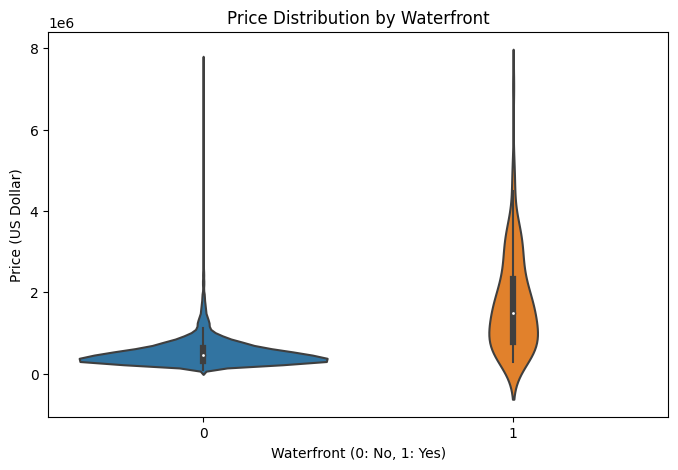

In [164]:
# hypothesis 1
# Creating the violin plot
sns.violinplot(data=df_vio, x='waterfront', y='price')
plt.title('Price Distribution by Waterfront')
plt.xlabel('Waterfront (0: No, 1: Yes)')
plt.ylabel('Price (US Dollar)')
plt.show()

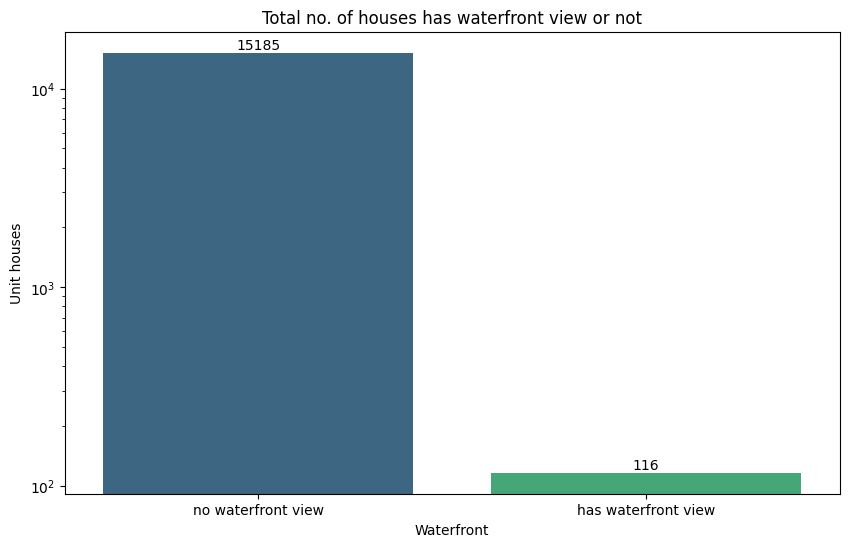

In [165]:
# Create the bar chart with Seaborn
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(data=df_sales_details,
              x='waterfront', 
              order=df_sales_details['waterfront'].value_counts().index[:], 
              palette='viridis')
plt.title('Total no. of houses has waterfront view or not')
plt.xlabel('Waterfront')
plt.ylabel('Unit houses')
# do it log scale since one var has extreme high value
plt.yscale('log')
plt.xticks([0,1], ['no waterfront view', 'has waterfront view'])

ax.bar_label(ax.containers[0])

plt.show()

In [166]:
# check how many values do waterfront has
df_sales_details['waterfront'].unique()

array([0, 1])

<style>
r { color: Red }
</style>
Since the value is either 0 or 1 (either u have waterfront or not), one can assume 0=false, 1=true.   
Based on Mr. Sanders <r>first requirement</r>, select only waterfront = 1

In [167]:
# can drop conditional rows with .drop method
#df_sales_details = df_sales_details.drop(df_sales_details[df_sales_details['waterfront'] < 1].index)

# but much easier with .query :)
# instead of remove rows, .query select conditional rows
df_sales_details = df_sales_details.query('waterfront > 0')
df_sales_details.reset_index(inplace=True, drop=True)

# check no.of rows
df_sales_details.shape

(116, 21)

In [168]:
df_sales_details

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
0,2015-03-11,1350000.000,822039084,3.000,2.500,2753.000,65005.000,1.000,1,2,...,9,2165.000,588.000,1953,0,98070,47.404,-122.451,2680.000,72513.000
1,2015-04-13,655000.000,8096000060,2.000,1.750,1450.000,15798.000,2.000,1,4,...,7,1230.000,220.000,1915,19780,98166,47.450,-122.375,2030.000,13193.000
2,2014-09-29,2400000.000,2025069065,4.000,2.500,3650.000,8354.000,1.000,1,4,...,9,1830.000,1820.000,2000,0,98074,47.634,-122.072,3120.000,18841.000
3,2014-10-27,369900.000,2123039032,1.000,0.750,760.000,10079.000,1.000,1,4,...,5,760.000,0.000,1936,0,98070,47.468,-122.438,1230.000,14267.000
4,2014-06-24,3080000.000,3225069065,4.000,5.000,4550.000,18641.000,1.000,1,4,...,10,2600.000,1950.000,2002,0,98074,47.605,-122.077,4550.000,19508.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2015-03-17,1900000.000,2025069140,3.000,2.500,2830.000,4334.000,3.000,1,4,...,10,2830.000,0.000,2006,0,98074,47.632,-122.071,2830.000,38211.000
112,2014-08-11,3000000.000,518500480,3.000,3.500,4410.000,10756.000,2.000,1,4,...,11,3430.000,980.000,2014,0,98056,47.528,-122.205,3550.000,5634.000
113,2015-04-17,2300000.000,8043700105,4.000,4.000,4360.000,8175.000,2.500,1,4,...,10,3940.000,420.000,2007,0,98008,47.572,-122.104,2670.000,8525.000
114,2014-10-08,2230000.000,518500460,3.000,3.500,3760.000,5634.000,2.000,1,4,...,11,2830.000,930.000,2014,0,98056,47.529,-122.205,3560.000,5762.000


<style>
r { color: Red }
</style>

### <r>Second requirement: Enough space for a family</r> 

In [169]:
df_scatt = df_sales_details.copy()

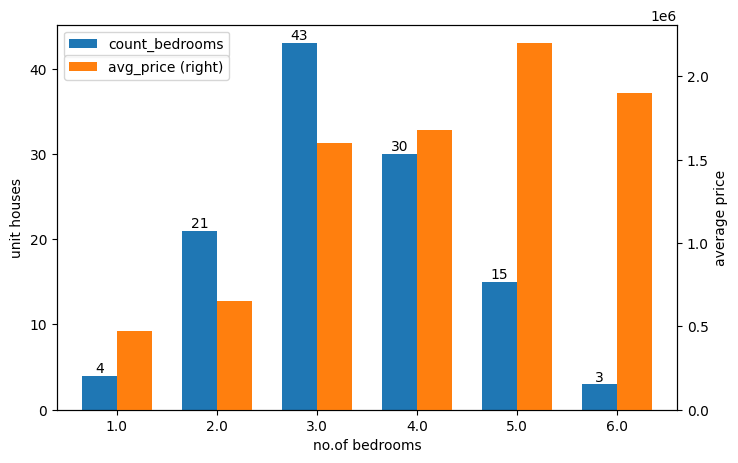

,count_bedrooms,avg_price
bedrooms,,
1.000,4,469950.000
2.000,21,655000.000
3.000,43,1600000.000
4.000,30,1680000.000
5.000,15,2200000.000
6.000,3,1900000.000


In [170]:
# hypothesis 2
# Aggregate data for plotting
avg_price = df_scatt.groupby('bedrooms')['price'].median().reset_index()
avg_price.columns = ['bedrooms', 'avg_price']

count_bedrooms = df_scatt['bedrooms'].value_counts().reset_index().sort_values(by='bedrooms')
count_bedrooms.columns = ['bedrooms', 'count_bedrooms']

# Merge the data
merged_data = pd.merge(count_bedrooms, avg_price, on='bedrooms')
merged_data = merged_data.set_index('bedrooms')
merged_data

# Create bar plot with two different y-axis
# width of the bin
width = 0.7

merged_data.plot(kind='bar',
                 secondary_y='avg_price',
                 rot=0,
                 width = width)

#plt.yscale('log')

# get the current figure
ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('unit houses')
ax2.set_ylabel('average price')
ax1.set_xlabel('no.of bedrooms')

ax1.bar_label(ax1.containers[0])
#ax2.bar_label(ax2.containers[0])

ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.94))

plt.show()
merged_data

<style>
r { color: Red }
</style>

Since Mr. Sanders has kids, I chose no. of bedrooms at least 3 to fulfill <r>second requirement</r>.

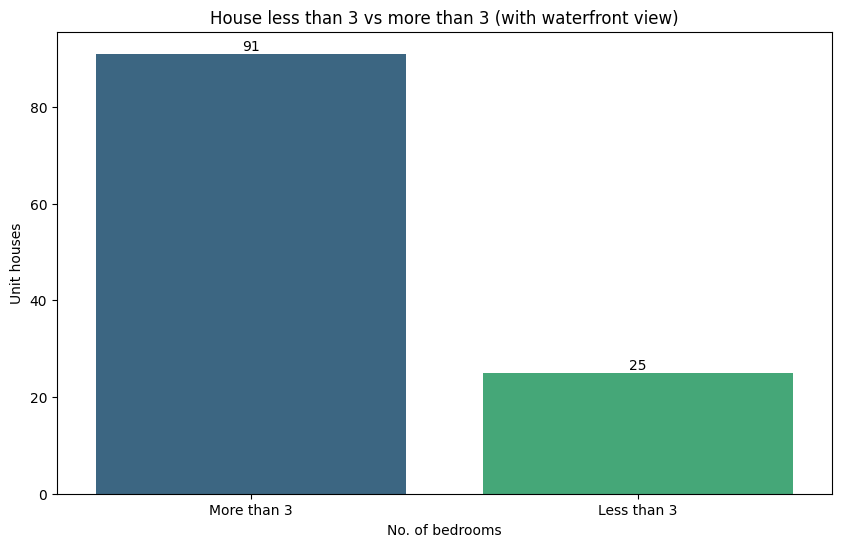

In [171]:
house_bed = df_sales_details.copy()

# Create a new column to categorize the number of bedrooms
house_bed['bedroom_category'] = house_bed['bedrooms'].apply(lambda x: 'Less than 3' if x < 3 else 'More than 3')


# Plot the count plot
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(data=house_bed, 
                   x='bedroom_category',
                   palette='viridis')

ax.bar_label(ax.containers[0])

plt.title('House less than 3 vs more than 3 (with waterfront view)')
plt.xlabel('No. of bedrooms')
plt.ylabel('Unit houses')
plt.show()

#house_bed

In [172]:
# remove rows less than 3 bedrooms
df_sales_details = df_sales_details.query('bedrooms >= 3')

# reset the index because we removed rows
df_sales_details.reset_index(inplace=True, drop=True)

df_sales_details.shape

(91, 21)

In [173]:
df_sales_details.head(2)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
0,2015-03-11,1350000.000,822039084,3.000,2.500,2753.000,65005.000,1.000,1,2,...,9,2165.000,588.000,1953,0,98070,47.404,-122.451,2680.000,72513.000
1,2014-09-29,2400000.000,2025069065,4.000,2.500,3650.000,8354.000,1.000,1,4,...,9,1830.000,1820.000,2000,0,98074,47.634,-122.072,3120.000,18841.000


In [174]:
# check how many values do bedrooms has
df_sales_details['bedrooms'].unique()

array([3., 4., 5., 6.])

In [175]:
# sum them to check the total is as shown in plot
df_sales_details['bedrooms'].value_counts().sum()

91

<style>
r { color: Red }
</style>

### <r>Third requirement: Nice and isolated</r> 

Definition of nice can be described from 3 variables:
- condition --> building condition, rated from 1 to 5.
- grade --> construction quality, rated from 1 to 13
- view --> quality of view

More info, see: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b

First, let see if there is any correlation between these three attributes

In [176]:
df_sales_details.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude', 'sqft_living_15neighbors',
       'sqft_lots_15neighbors'],
      dtype='object')

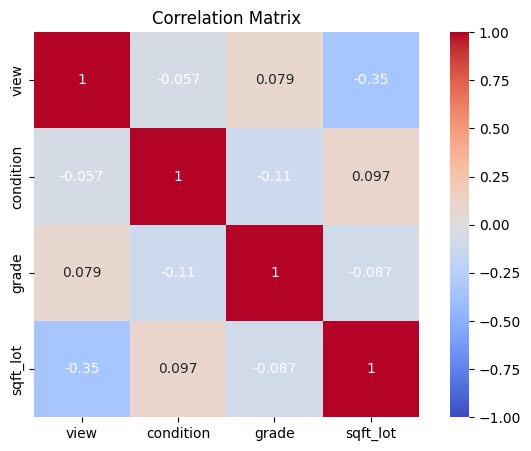

In [177]:
# hypothesis
df_corr = df_sales_details.copy()

corr_matrix = df_corr[['view', 
                       'condition', 
                       'grade', 
                       'sqft_lot'
                       ]].corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
ax.collections[0].set_clim(-1,1)     # set vmin and vmax

plt.title('Correlation Matrix')
plt.show()

In [178]:
df_sales_details.shape

(91, 21)

hard cut on the condition, grade and view

In [179]:
df_third = df_sales_details.copy()

In [180]:
df_third['view'].unique()

array([2, 4, 3, 1])

In [181]:
df_third['condition'].unique()

array([5, 3, 4, 2])

In [182]:
df_third['grade'].unique()

array([ 9, 10, 12,  8,  7,  6, 11])

In [183]:
df_third = df_third.query('condition >= 4')
df_third.shape

(35, 21)

In [184]:
df_third = df_third.query('grade >= 9 ')
df_third.shape

(21, 21)

In [185]:
df_third = df_third.query('view >= 4')
df_third.shape

(17, 21)

definition of isolation: top 25 percent of the footage of the lot

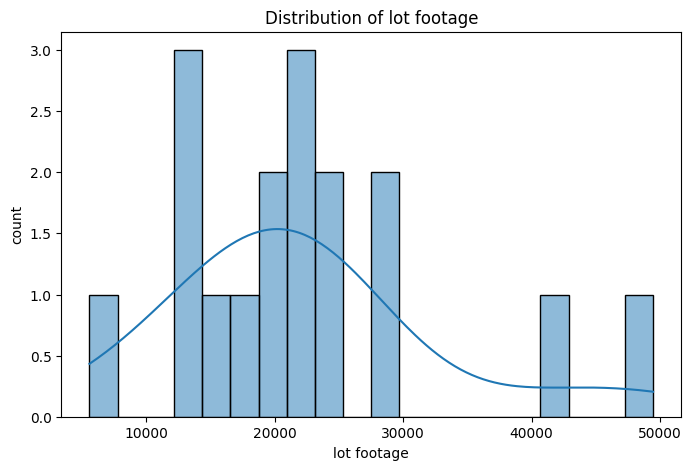

In [186]:
sns.histplot(data=df_third,
             x='sqft_lot',
             bins=20,
             kde=True)
plt.title('Distribution of lot footage')
plt.xlabel('lot footage')
plt.ylabel('count')
plt.show()

In [187]:
df_third.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
count,17,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000,...,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000,17.000
mean,2014-11-11 09:52:56.470588160,2457058.824,3984041687.529,3.588,3.265,4083.118,22284.353,1.735,1.000,4.000,...,10.294,3184.882,898.235,1969.529,3508.824,98086.000,47.558,-122.247,3328.412,23423.294
min,2014-06-18 00:00:00,770000.000,622049114.000,3.000,2.500,2050.000,5575.000,1.000,1.000,4.000,...,9.000,1580.000,0.000,1930.000,0.000,98006.000,47.353,-122.398,2030.000,5575.000
25%,2014-08-25 00:00:00,1700000.000,2425049063.000,3.000,2.750,3120.000,16015.000,1.500,1.000,4.000,...,10.000,2370.000,0.000,1958.000,0.000,98040.000,47.525,-122.348,2800.000,12210.000
50%,2014-10-28 00:00:00,2600000.000,3625059152.000,3.000,3.000,3920.000,21300.000,2.000,1.000,4.000,...,10.000,2810.000,910.000,1974.000,0.000,98075.000,47.572,-122.241,3350.000,15810.000
75%,2015-02-18 00:00:00,3200000.000,5154700060.000,4.000,3.500,4850.000,24691.000,2.000,1.000,4.000,...,11.000,3910.000,1270.000,1989.000,0.000,98136.000,47.608,-122.197,3810.000,25582.000
max,2015-04-21 00:00:00,3850000.000,8106100105.000,6.000,4.750,7000.000,49456.000,2.000,1.000,4.000,...,12.000,5770.000,3500.000,1996.000,19890.000,98198.000,47.701,-122.083,4913.000,104374.000
std,NaN,957619.214,2524554558.037,0.795,0.676,1325.648,10576.542,0.437,0.000,0.000,...,0.985,1261.475,919.519,21.419,7813.209,60.955,0.089,0.109,787.097,22557.825


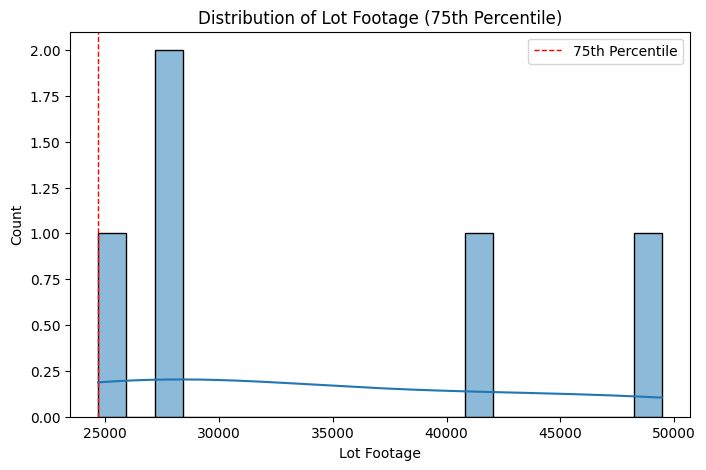

In [188]:
# Calculate the 75th percentile of lot footage
percentile_75 = df_third['sqft_lot'].quantile(0.75)


# Filter data for values less than or equal to the 75th percentile
df_filtered = df_third[df_third['sqft_lot'] >= percentile_75].reset_index()

# Plotting the histogram of the filtered data
sns.histplot(data=df_filtered, 
             x='sqft_lot', 
             bins=20, 
             kde=True)


plt.axvline(percentile_75, color='r', linestyle='dashed', linewidth=1, label='75th Percentile')
plt.title('Distribution of Lot Footage (75th Percentile)')
plt.xlabel('Lot Footage')
plt.ylabel('Count')
plt.legend()
plt.show()



In [189]:
df_filtered.describe()

,index,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors
count,5.000,5,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,...,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
mean,61.000,2014-10-05 04:48:00,2224000.000,5434285683.800,3.400,2.900,4090.000,34343.400,1.400,1.000,...,10.200,2500.000,1590.000,1972.200,7952.000,98112.600,47.519,-122.256,3220.600,27215.800
min,21.000,2014-07-25 00:00:00,1160000.000,624069108.000,3.000,2.500,2490.000,24691.000,1.000,1.000,...,9.000,1580.000,530.000,1958.000,0.000,98008.000,47.353,-122.398,2030.000,14663.000
25%,57.000,2014-08-12 00:00:00,1230000.000,3625059152.000,3.000,2.500,3120.000,28064.000,1.000,1.000,...,9.000,2370.000,910.000,1961.000,0.000,98075.000,47.488,-122.364,2550.000,24121.000
50%,64.000,2014-10-23 00:00:00,2230000.000,7204200025.000,3.000,3.000,3620.000,28206.000,1.000,1.000,...,10.000,2460.000,1250.000,1974.000,0.000,98136.000,47.552,-122.323,2800.000,30401.000
75%,81.000,2014-10-28 00:00:00,3200000.000,7781600025.000,4.000,3.250,4220.000,41300.000,2.000,1.000,...,11.000,2590.000,1760.000,1977.000,19870.000,98146.000,47.593,-122.110,3810.000,32181.000
max,82.000,2014-12-30 00:00:00,3300000.000,7936500109.000,4.000,3.250,7000.000,49456.000,2.000,1.000,...,12.000,3500.000,3500.000,1991.000,19890.000,98198.000,47.608,-122.086,4913.000,34713.000
std,24.829,NaN,1028411.396,3213838926.064,0.548,0.379,1746.912,10571.806,0.548,0.000,...,1.304,684.288,1159.590,13.293,10888.727,72.992,0.103,0.147,1146.271,8033.637


In [190]:
df_filtered.shape


(5, 22)

<style>
r { color: Red }
</style>

### <r>Forth requirement: Central neighborhood</r> 


In [191]:
df_forth = df_filtered.copy()

In [192]:
# Convert latitude and longitude to radians
df_forth['lat_rad'] = np.radians(df_forth['latitude'])
df_forth['long_rad'] = np.radians(df_forth['longitude'])

# Define grid size
grid_size = 0.0001  # Adjust according to your preference

# Assign each point to a grid cell
df_forth['lat_bin'] = (df_forth['lat_rad'] / grid_size).astype(int)
df_forth['long_bin'] = (df_forth['long_rad'] / grid_size).astype(int)

# Calculate centroids of grid cells
centroids = df_forth.groupby(['lat_bin', 'long_bin']).agg({'lat_rad': 'mean', 'long_rad': 'mean', 'price': 'mean'}).reset_index()

# Convert centroids back to degrees
centroids['lat'] = np.degrees(centroids['lat_rad'])
centroids['long'] = np.degrees(centroids['long_rad'])

# Create the plot
fig = px.scatter_mapbox(centroids, 
                        lat='lat', 
                        lon='long', 
                        color='price', 
                        size='price',
                        color_continuous_scale='Viridis',
                        size_max=10,
                        mapbox_style='carto-positron', 
                        zoom=9)

# Update layout
fig.update_layout(title='Geolocation Plot by Average Price per Living (Clustered)',
                  mapbox=dict(center=dict(lat=47.6, lon=-122.3)),
                  margin=dict(r=0, l=0, t=0, b=0))

# Show the plot
fig.show()

In [193]:
df_forth.sort_values(by='price')

,index,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors,lat_rad,long_rad,lat_bin,long_bin
0,21,2014-10-23,1160000.000,7781600025,3.000,2.500,2490.000,24691.000,1.000,1,...,0,98146,47.488,-122.364,2800.000,24121.000,0.829,-2.136,8288,-21356
4,82,2014-10-28,1230000.000,7204200025,4.000,2.500,3120.000,49456.000,2.000,1,...,19890,98198,47.353,-122.323,2030.000,32181.000,0.826,-2.135,8264,-21349
1,57,2014-07-25,2230000.000,7936500109,3.000,3.000,3620.000,28064.000,2.000,1,...,0,98136,47.552,-122.398,2550.000,34713.000,0.830,-2.136,8299,-21362
2,64,2014-08-12,3200000.000,624069108,4.000,3.250,7000.000,28206.000,1.000,1,...,0,98075,47.593,-122.086,4913.000,14663.000,0.831,-2.131,8306,-21308
3,81,2014-12-30,3300000.000,3625059152,3.000,3.250,4220.000,41300.000,1.000,1,...,19870,98008,47.608,-122.110,3810.000,30401.000,0.831,-2.131,8309,-21312


In [194]:
df_forth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    5 non-null      int64         
 1   date                     5 non-null      datetime64[ns]
 2   price                    5 non-null      float64       
 3   house_id                 5 non-null      int64         
 4   bedrooms                 5 non-null      float64       
 5   bathrooms                5 non-null      float64       
 6   sqft_living              5 non-null      float64       
 7   sqft_lot                 5 non-null      float64       
 8   floors                   5 non-null      float64       
 9   waterfront               5 non-null      int64         
 10  view                     5 non-null      int64         
 11  condition                5 non-null      int64         
 12  grade                    5 non-null     

In [195]:
df_forth['zipcode'].unique()

array([98146, 98136, 98075, 98008, 98198])

<style>
r { color: Red }
</style>

### <r>Fifth requirement: Limited budget</r>

In [196]:
df_fifth = df_forth.copy()
df_fifth.columns

Index(['index', 'date', 'price', 'house_id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longitude', 'sqft_living_15neighbors',
       'sqft_lots_15neighbors', 'lat_rad', 'long_rad', 'lat_bin', 'long_bin'],
      dtype='object')

In [197]:
df_fifth.sort_values(by='price')
df_fifth

,index,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,year_renovated,zipcode,latitude,longitude,sqft_living_15neighbors,sqft_lots_15neighbors,lat_rad,long_rad,lat_bin,long_bin
0,21,2014-10-23,1160000.000,7781600025,3.000,2.500,2490.000,24691.000,1.000,1,...,0,98146,47.488,-122.364,2800.000,24121.000,0.829,-2.136,8288,-21356
1,57,2014-07-25,2230000.000,7936500109,3.000,3.000,3620.000,28064.000,2.000,1,...,0,98136,47.552,-122.398,2550.000,34713.000,0.830,-2.136,8299,-21362
2,64,2014-08-12,3200000.000,624069108,4.000,3.250,7000.000,28206.000,1.000,1,...,0,98075,47.593,-122.086,4913.000,14663.000,0.831,-2.131,8306,-21308
3,81,2014-12-30,3300000.000,3625059152,3.000,3.250,4220.000,41300.000,1.000,1,...,19870,98008,47.608,-122.110,3810.000,30401.000,0.831,-2.131,8309,-21312
4,82,2014-10-28,1230000.000,7204200025,4.000,2.500,3120.000,49456.000,2.000,1,...,19890,98198,47.353,-122.323,2030.000,32181.000,0.826,-2.135,8264,-21349
